In [2]:
#import packages
import numpy as np 
import pandas as pd

from sklearn import svm

#visualize your data 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(font_scale=1.2)

In [3]:
#import dataset 
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


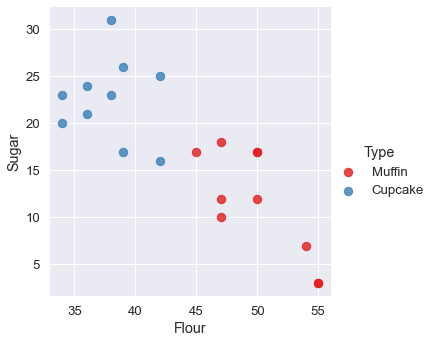

In [4]:
#plot the dataset 
sns.lmplot('Flour','Sugar', data=recipes,hue='Type', palette='Set1',fit_reg=False, scatter_kws={"s":70})

In [11]:
#format or preprocess our data 
# np.where is used to write a condtion that to check the column with a value 
type_label = np.where(recipes['Type']=='Muffin',0,1)
# take out the columns that from second columns and make it to a list (useing .tolist() function)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[['Flour', 'Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [12]:
#fit our svm mode
#  SVR and SVC are commonly used packages 
# here we going to use SVC - this is widely and commonly used for classification (C-Support Vector Classification)
# another one there its called as SVR - this commonly used for regression (Epsilon-support vector regression)

# there are 8 of them 
# svm.LinearSVC - Linear Support Vector Classification
# # svm.LinearSVR - Linear Support Vector Regression
# svm.NuSVC - Nu-Support Vector Classification
# svm.NuSVR - Nu Support Vector Regression
# svm.OneClassSVM - Unsupervised Outlier Detetion
# svm.SVC - C-Support Vetor Classification
# svm.SVR - Epsilon-Support Vector Classification
# svm.l1_min_c - Return thelowest bound for C in (l1_min_C, infinity) the model is guaranteed not to be empty
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [17]:
# get this seperating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]

# plot the paralets to the separating hyperpleane that pass through the support vector 
b =  model.support_vectors_[0]
yy_down = a * xx + (b[1] - a* b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


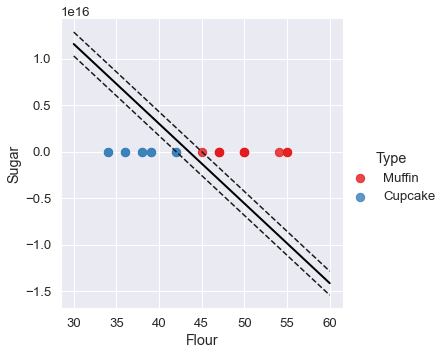

In [20]:
sns.lmplot('Flour','Sugar', data=recipes,hue='Type', palette='Set1',fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth = 2, color='black')
# the the gyper plane will be go through the nearest data points 
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [25]:
# create the function tot predict muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])) == 0:
        print('you\'re looking at a muffin recipe!')
    else:
        print('you\'re looking at a cupcake recipe!')

# Predict if 50 parts flour and 12 parts sugar
muffin_or_cupcake(50,20)

you're looking at a muffin recipe!


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


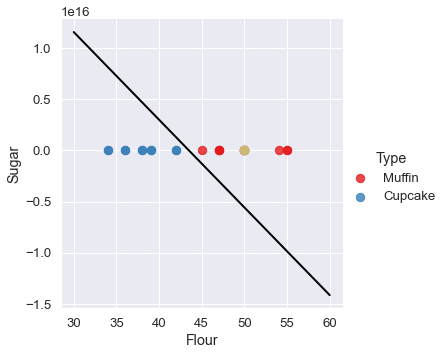

In [26]:
# lets plot this in the graph
sns.lmplot('Flour','Sugar', data=recipes,hue='Type', palette='Set1',fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth = 2, color='black')
plt.plot(50,20, 'yo', markersize='9')